In [23]:
from metpy.units import units
import metpy.calc as mpcalc

units.hPa

<Unit('hectopascal')>

In [57]:
import numpy as np

for tempo in pd.to_datetime(df_s.time).unique():
    df_probe = df_s[pd.to_datetime(df_s['time']) == tempo]
    df_probe.reset_index(inplace = True)
    
    pressure_values = df_probe['pressure'].to_numpy()
    temperature_values = df_probe['temperature'].to_numpy()
    dewpoint_values = df_probe['dewpoint'].to_numpy()
    
    vals, unq_indices, c = np.unique(pressure_values, return_index=True, return_counts=True)
    dup = vals[c > 1]
    
    if(len(dup)>0):
        idx_vals_repeated = np.where(c > 1)[0]
        vals_repeated = vals[idx_vals_repeated]

        print(unq_indices)
        print(pressure_values)
        print(idx_vals_repeated)
        print(vals_repeated)

        print(vals)
        print(c)
        print(dup)
        print(pressure_values)
        print(temperature_values)
        print(dewpoint_values)
        break

[79 78 77 76 75 74 73 72 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55
 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1  0]
[1012.  1000.   925.   913.   850.   795.   746.   718.   709.   700.
  689.   634.   630.   622.   618.   603.   581.   546.   529.   500.
  491.   469.   456.   429.   402.   400.   388.   364.   359.   352.
  338.   331.   322.   317.   303.   301.   300.   299.   280.   259.
  252.   250.   248.   238.   236.   213.   208.   200.   192.   176.
  167.   160.   150.   149.   141.   109.   103.   101.   100.    79.6
   77.    75.5   70.    67.9   64.4   62.    61.1   58.1   52.4   50.
   47.4   47.4   42.9   41.1   40.8   38.8   37.    36.9   35.1   32. ]
[8]
[47.4]
[  32.    35.1   36.9   37.    38.8   40.8   41.1   42.9   47.4   50.
   52.4   58.1   61.1   62.    64.4   67.9   70.    75.5   77.    79.6
  100.   101.   103.   109.   141.   149.  

In [34]:
from metpy.calc import dewpoint_from_relative_humidity, parcel_profile
from metpy.units import units
# pressure
p = [1008., 1000., 950., 900., 850., 800., 750., 700., 650., 600.,
     550., 500., 450., 400., 350., 300., 250., 200.,
     175., 150., 125., 100., 80., 70., 60., 50.,
     40., 30., 25., 20.] * units.hPa
# temperature
T = [29.3, 28.1, 23.5, 20.9, 18.4, 15.9, 13.1, 10.1, 6.7, 3.1,
     -0.5, -4.5, -9.0, -14.8, -21.5, -29.7, -40.0, -52.4,
     -59.2, -66.5, -74.1, -78.5, -76.0, -71.6, -66.7, -61.3,
     -56.3, -51.7, -50.7, -47.5] * units.degC
# relative humidity
rh = [.85, .65, .36, .39, .82, .72, .75, .86, .65, .22, .52,
      .66, .64, .20, .05, .75, .76, .45, .25, .48, .76, .88,
      .56, .88, .39, .67, .15, .04, .94, .35] * units.dimensionless
# calculate dewpoint
Td = dewpoint_from_relative_humidity(T, rh)
# computer parcel temperature
parcel_profile(p, T[0], Td[0]).to('degC')

Magnitude,[29.30000000000001 29.30000000000001 25.222147384020218 23.460975347242083 21.58359279560426 19.57260398482498 17.406361852039822 15.057486153977663 12.490648661013665 9.659253895822644 6.500234908917548 2.9256036460892005 -1.1917284638130354 -6.04257883658039 -11.924975168790468 -19.317653604943246 -28.976724644755308 -41.94444385189527 -50.011730762116485 -59.3093624797491 -70.02760604264736 -82.53084922667225 -94.29667129619958 -100.99074330775701 -108.4082993349599 -116.77024488747216 -126.42910221755437 -138.0064958359133 -144.8661588565159 -152.7896702869799]
Units,degree_Celsius


In [54]:
import numpy as np

def replace_duplicates_with_mean(arr):
    unique_arr = np.unique(arr)
    mean_values = np.zeros_like(unique_arr, dtype=np.float32)

    for i, value in enumerate(unique_arr):
        mean_values[i] = np.mean(arr[arr == value])

    return mean_values[np.searchsorted(unique_arr, arr)]

# example usage
arr = np.array([1, 2, 2, 3, 3, 3])
result = replace_duplicates_with_mean(arr)
print(result)


[1. 2. 2. 3. 3. 3.]


In [58]:
import numpy as np

def find_duplicate_indices(arr):
    """
    Takes a NumPy array as input and returns the indices of the duplicate values.
    """
    # Get the unique values and their counts
    unique_vals, val_counts = np.unique(arr, return_counts=True)

    # Find the indices where the counts are greater than 1
    duplicate_indices = np.where(val_counts > 1)[0]

    # Get the indices of the duplicate values
    indices = []
    for val in unique_vals[duplicate_indices]:
        indices.append(np.where(arr == val)[0])

    return np.concatenate(indices)

# Example usage
arr = np.array([1, 2, 3, 2, 4, 1])
duplicate_indices = find_duplicate_indices(arr)
print(duplicate_indices)


[0 5 1 3]


In [63]:
import numpy as np

def find_duplicates(arr):
    # Get the unique elements and their counts
    unique, counts = np.unique(arr, return_counts=True)
    
    # Find the indices of elements that have more than one occurrence
    duplicate_indices = np.where(counts > 1)[0]
    
    # Get the values and indices of the duplicate elements
    duplicate_values = unique[duplicate_indices]
    duplicate_indices = [np.where(arr == value)[0] for value in duplicate_values]
    
    return duplicate_indices, duplicate_values

# Example usage
arr1 = np.array([1, 1, 2, 2, 3, 3, 5, 6])
arr2 = np.array([0, 1, 2, 3, 4, 5, 6, 7])
indices, values = find_duplicates(arr1)
print("Indices of duplicate values:", indices)
print("Duplicate values:", values)

print(arr1[indices[0]])
print(arr1[indices[1]])
print(arr1[indices[2]])

Indices of duplicate values: [array([0, 1]), array([2, 3]), array([4, 5])]
Duplicate values: [1 2 3]
[1 1]
[2 2]
[3 3]


In [1]:
input_file = '../data/sounding_stations/2012-02-02.csv'
    
dtype_dict = {'pressure': 'float',
                  'height': 'float',
                  'temperature': 'float',
                  'dewpoint': 'float',
                  'direction': 'float',
                  'speed': 'float',
                  'u_wind': 'float',
                  'v_wind': 'float',
                  'station': 'str',
                  'station_number': 'int',
                  'time': 'str',
                  'latitude': 'float',
                  'longitude': 'float',
                  'elevation': 'float',
                  'pw': 'float'}

df_s = pd.read_csv(input_file, header=0, dtype=dtype_dict, on_bad_lines='skip')
df_s.head(22)

NameError: name 'pd' is not defined

In [77]:
df_s = df_s.dropna()
#df_s.reset_index(inplace = True)
df_s.head(23)

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,47.0,21006.0,-67.9,-88.2,100.0,29.0,-28.559425,5.035797e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
1,40.0,21987.0,-66.0,-89.5,80.0,38.0,-37.422695,-6.598631e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
2,37.0,22462.0,-65.0,-90.2,95.0,32.0,-31.878230,2.788984e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
3,35.0,22800.0,-64.3,-90.6,80.0,33.0,-32.498656,-5.730390e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
4,33.0,23158.0,-63.6,-91.1,90.0,39.0,-39.000000,-2.388061e-15,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
5,32.0,23345.0,-63.2,-91.4,85.0,32.0,-31.878230,-2.788984e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
6,30.7,23597.0,-62.7,-91.7,91.0,37.0,-36.994365,6.457390e-01,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
7,30.0,23740.0,-61.1,-91.1,95.0,40.0,-39.847788,3.486230e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
8,25.4,24789.0,-54.7,-86.7,100.0,54.0,-53.179619,9.377002e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
10,70.0,18660.0,-74.5,-90.5,95.0,30.0,-29.885841,2.614672e+00,SBGL,83746,2012-02-02,-22.81,-43.25,42.0,0.00


# utc_to_local

In [53]:
import pytz
from datetime import datetime

def utc_to_local(utc_string, local_tz, format_string):
    '''
    The function first converts the UTC string to a datetime object with timezone information 
    using strptime() and replace(). Then it converts the datetime object to the local timezone 
    using astimezone(). Finally, it formats the resulting datetime as a string in the same
    format as the input string.

    Here's an example usage of the function:
    
        utc_string = '1972-09-13 12:00:00'
        local_tz = 'America/Sao_Paulo'
        format_string = '%Y-%m-%d %H:%M'
        local_string = utc_to_local(utc_string, local_tz, format_string)
        print(local_string)

    '''
    # convert utc string to datetime object
    utc_dt = datetime.strptime(utc_string, format_string).replace(tzinfo=pytz.UTC)
    
    # convert to local timezone
    local_tz = pytz.timezone(local_tz)
    local_dt = utc_dt.astimezone(local_tz)
    
    # format as string and return
    return local_dt.strftime(format_string)

In [54]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [55]:
utc_string = '1972-09-13 12:00'
local_tz = 'America/Sao_Paulo'
format_string = '%Y-%m-%d %H:%M'
local_string = utc_to_local(utc_string, local_tz, format_string)
print(local_string)

1972-09-13 09:00


# Load weather station data

In [113]:
import pandas as pd
df_ws = pd.read_csv('../data/weather_stations/A652_1997_2022.csv')
df_ws.head(10)

,Unnamed: 0,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,0,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,0
1,1,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,100
2,2,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,200
3,3,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,300
4,4,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,400
5,5,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,500
6,6,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,600
7,7,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,700
8,8,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,800
9,9,RIO DE JANEIRO - FORTE DE COPACABANA,NaN,NaN,-22.988333,NaN,RJ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A652,900


In [114]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219144 entries, 0 to 219143
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    219144 non-null  int64  
 1   DC_NOME       219144 non-null  object 
 2   PRE_INS       126728 non-null  float64
 3   TEM_SEN       122643 non-null  float64
 4   VL_LATITUDE   219144 non-null  float64
 5   PRE_MAX       126692 non-null  float64
 6   UF            219144 non-null  object 
 7   RAD_GLO       119826 non-null  float64
 8   PTO_INS       123071 non-null  float64
 9   TEM_MIN       126687 non-null  float64
 10  VL_LONGITUDE  219144 non-null  float64
 11  UMD_MIN       123001 non-null  float64
 12  PTO_MAX       122991 non-null  float64
 13  VEN_DIR       117894 non-null  float64
 14  DT_MEDICAO    219144 non-null  object 
 15  CHUVA         126502 non-null  float64
 16  PRE_MIN       126692 non-null  float64
 17  UMD_MAX       123016 non-null  float64
 18  VEN_

In [115]:
min(df_ws.DT_MEDICAO), max(df_ws.DT_MEDICAO)

('1997-01-01', '2021-12-31')

In [116]:
df_ws = df_ws[df_ws['CHUVA'].notna()]

In [117]:
min(df_ws.DT_MEDICAO), max(df_ws.DT_MEDICAO)

('2007-05-18', '2021-12-31')

In [118]:
def format_time(input_str):
    '''
    This function first converts the input string to an integer using the int function. 
    It then extracts the hours and minutes from the input integer using integer division and modulus operations. 
    Finally, it formats the output string using f-strings to ensure that both hours and minutes are represented with two digits.
    Usage examples:
        print(format_time("100"))   # Output: "01:00"
        print(format_time("1200"))  # Output: "12:00"
        print(format_time("2300"))  # Output: "23:00"
    '''
    # Convert input string to integer
    input_int = int(input_str)
    
    # Extract hours and minutes from the input integer
    hours = input_int // 100
    minutes = input_int % 100
    
    # Format the output string
    output_str = f"{hours:02}:{minutes:02}"
    
    return output_str

In [119]:
df_ws.HR_MEDICAO = df_ws.HR_MEDICAO.apply(format_time)

In [120]:
df_ws.DT_MEDICAO

90954     2007-05-18
90955     2007-05-18
90971     2007-05-19
90972     2007-05-19
90973     2007-05-19
             ...    
219139    2021-12-31
219140    2021-12-31
219141    2021-12-31
219142    2021-12-31
219143    2021-12-31
Name: DT_MEDICAO, Length: 126502, dtype: object

In [121]:
# df_ws['time'] = df_ws.DT_MEDICAO + ' ' + df_ws.HR_MEDICAO.apply(format_time)
# df_ws['time'] = df_ws.DT_MEDICAO + ' ' + df_ws.HR_MEDICAO

In [122]:
# df_ws['time']

In [123]:
df_ws['Datetime'] = pd.to_datetime(df_ws.DT_MEDICAO + ' ' + df_ws.HR_MEDICAO)

In [124]:
df_ws.head()

,Unnamed: 0,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,...,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO,Datetime
90954,3306,RIO DE JANEIRO - FORTE DE COPACABANA,1010.0,20.6,-22.988333,1010.1,RJ,100.8,21.1,23.5,...,21.1,23.8,11.7,6.4,26.0,23.5,86.0,A652,18:00,2007-05-18 18:00:00
90955,3307,RIO DE JANEIRO - FORTE DE COPACABANA,1010.4,19.3,-22.988333,1010.4,RJ,35.6,21.0,23.2,...,20.7,23.3,11.6,7.9,26.0,23.2,87.0,A652,19:00,2007-05-18 19:00:00
90971,3323,RIO DE JANEIRO - FORTE DE COPACABANA,1013.2,25.2,-22.988333,1013.2,RJ,91.2,19.3,23.1,...,18.2,23.6,11.7,2.0,23.0,23.6,77.0,A652,11:00,2007-05-19 11:00:00
90972,3324,RIO DE JANEIRO - FORTE DE COPACABANA,1013.5,25.7,-22.988333,1013.5,RJ,141.0,20.6,23.6,...,19.4,23.9,11.7,1.5,24.0,23.9,82.0,A652,12:00,2007-05-19 12:00:00
90973,3325,RIO DE JANEIRO - FORTE DE COPACABANA,1013.8,22.5,-22.988333,1013.9,RJ,428.8,19.3,24.3,...,19.0,25.0,12.2,5.4,25.0,25.0,71.0,A652,13:00,2007-05-19 13:00:00


In [125]:
df_ws['Datetime']

90954    2007-05-18 18:00:00
90955    2007-05-18 19:00:00
90971    2007-05-19 11:00:00
90972    2007-05-19 12:00:00
90973    2007-05-19 13:00:00
                 ...        
219139   2021-12-31 19:00:00
219140   2021-12-31 20:00:00
219141   2021-12-31 21:00:00
219142   2021-12-31 22:00:00
219143   2021-12-31 23:00:00
Name: Datetime, Length: 126502, dtype: datetime64[ns]

In [126]:
df_ws = df_ws.set_index(pd.DatetimeIndex(df_ws['Datetime']))

In [158]:
min(df_ws.index), max(df_ws.index)

(Timestamp('2007-05-18 18:00:00'), Timestamp('2021-12-31 23:00:00'))

In [127]:
df_ws = df_ws.drop(['HR_MEDICAO','DT_MEDICAO','Unnamed: 0', 'DC_NOME', 'CD_ESTACAO', 'UF', 'Datetime'], axis=1)

In [157]:
df_ws.head()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-18 18:00:00,1010.0,20.6,-22.988333,1010.1,100.8,21.1,23.5,-43.190556,85.0,21.2,...,1010.0,87.0,4.6,21.1,23.8,11.7,6.4,26.0,23.5,86.0
2007-05-18 19:00:00,1010.4,19.3,-22.988333,1010.4,35.6,21.0,23.2,-43.190556,86.0,21.1,...,1010.3,88.0,5.5,20.7,23.3,11.6,7.9,26.0,23.2,87.0
2007-05-19 11:00:00,1013.2,25.2,-22.988333,1013.2,91.2,19.3,23.1,-43.190556,74.0,19.3,...,1013.1,77.0,0.4,18.2,23.6,11.7,2.0,23.0,23.6,77.0
2007-05-19 12:00:00,1013.5,25.7,-22.988333,1013.5,141.0,20.6,23.6,-43.190556,77.0,20.6,...,1013.2,82.0,0.9,19.4,23.9,11.7,1.5,24.0,23.9,82.0
2007-05-19 13:00:00,1013.8,22.5,-22.988333,1013.9,428.8,19.3,24.3,-43.190556,71.0,19.5,...,1013.8,74.0,3.9,19.0,25.0,12.2,5.4,25.0,25.0,71.0


In [129]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PRE_INS       126502 non-null  float64
 1   TEM_SEN       122417 non-null  float64
 2   VL_LATITUDE   126502 non-null  float64
 3   PRE_MAX       126467 non-null  float64
 4   RAD_GLO       119600 non-null  float64
 5   PTO_INS       122845 non-null  float64
 6   TEM_MIN       126462 non-null  float64
 7   VL_LONGITUDE  126502 non-null  float64
 8   UMD_MIN       122776 non-null  float64
 9   PTO_MAX       122766 non-null  float64
 10  VEN_DIR       117668 non-null  float64
 11  CHUVA         126502 non-null  float64
 12  PRE_MIN       126467 non-null  float64
 13  UMD_MAX       122791 non-null  float64
 14  VEN_VEL       126073 non-null  float64
 15  PTO_MIN       122759 non-null  float64
 16  TEM_MAX       126462 non-null  float64
 17  TEN_BAT       

# Load sounding data

In [130]:
import pandas as pd
df_sounding = pd.read_csv('../data/sounding_stations/SBGL_indexes_2022-01-01_2022-12-31.csv')
df_sounding.head()

,time,cape,cin,lift,k,total_totals,showalter
0,2022-01-01 00:00:00,1147.704144,-48.135452,-276.000916,33.5,42.9,0.723299
1,2022-01-02 00:00:00,259.097715,-170.717647,-274.979475,39.1,46.8,-1.641964
2,2022-01-03 00:00:00,2427.450449,-40.744951,-278.511704,38.8,44.4,0.063668
3,2022-01-04 00:00:00,885.409861,-91.924625,-276.229623,39.7,45.6,-0.920404
4,2022-01-05 00:00:00,887.508955,-172.932892,-275.037476,37.0,43.6,0.131104


In [131]:
df_sounding.tail()

,time,cape,cin,lift,k,total_totals,showalter
603,2022-12-27 12:00:00,2756.140607,-63.543990,-279.222716,35.2,42.0,3.134060
604,2022-12-28 12:00:00,2179.125206,-34.789814,-278.548333,22.7,45.6,0.349621
605,2022-12-29 12:00:00,1255.902881,-56.589516,-276.844915,36.2,46.2,-0.289720
606,2022-12-30 12:00:00,2373.591061,0.000000,-278.734297,36.8,44.6,-0.503270
607,2022-12-31 12:00:00,877.487383,-76.785774,-276.626183,38.5,47.9,-1.194518


In [132]:
df_sounding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          608 non-null    object 
 1   cape          608 non-null    float64
 2   cin           608 non-null    float64
 3   lift          608 non-null    float64
 4   k             608 non-null    float64
 5   total_totals  608 non-null    float64
 6   showalter     608 non-null    float64
dtypes: float64(6), object(1)
memory usage: 33.4+ KB


In [133]:
df_sounding['time']

0      2022-01-01 00:00:00
1      2022-01-02 00:00:00
2      2022-01-03 00:00:00
3      2022-01-04 00:00:00
4      2022-01-05 00:00:00
              ...         
603    2022-12-27 12:00:00
604    2022-12-28 12:00:00
605    2022-12-29 12:00:00
606    2022-12-30 12:00:00
607    2022-12-31 12:00:00
Name: time, Length: 608, dtype: object

In [134]:
format_string = '%Y-%m-%d %H:%M:%S'
df_sounding['time'] = df_sounding['time'].apply(lambda x: utc_to_local(x, "America/Sao_paulo", format_string))

In [135]:
df_sounding['time']

0      2021-12-31 21:00:00
1      2022-01-01 21:00:00
2      2022-01-02 21:00:00
3      2022-01-03 21:00:00
4      2022-01-04 21:00:00
              ...         
603    2022-12-27 09:00:00
604    2022-12-28 09:00:00
605    2022-12-29 09:00:00
606    2022-12-30 09:00:00
607    2022-12-31 09:00:00
Name: time, Length: 608, dtype: object

In [136]:
format = '%Y-%m-%d %H:%M:%S'
df_sounding['Datetime'] = pd.to_datetime(df_sounding['time'], format=format)
df_sounding = df_sounding.set_index(pd.DatetimeIndex(df_sounding['Datetime']))
df_sounding = df_sounding.drop(['time', 'Datetime'], axis = 1)

In [137]:
df_sounding.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2021-12-31 21:00:00,1147.704144,-48.135452,-276.000916,33.5,42.9,0.723299
2022-01-01 21:00:00,259.097715,-170.717647,-274.979475,39.1,46.8,-1.641964
2022-01-02 21:00:00,2427.450449,-40.744951,-278.511704,38.8,44.4,0.063668
2022-01-03 21:00:00,885.409861,-91.924625,-276.229623,39.7,45.6,-0.920404
2022-01-04 21:00:00,887.508955,-172.932892,-275.037476,37.0,43.6,0.131104


# Merge dataframes

In [139]:
# merge dataframes on datetime column
merged_df = pd.merge(df_ws, df_sounding, on='Datetime', how='left')
merged_df.head(24)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-18 18:00:00,1010.0,20.6,-22.988333,1010.1,100.8,21.1,23.5,-43.190556,85.0,21.2,...,6.4,26.0,23.5,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-18 19:00:00,1010.4,19.3,-22.988333,1010.4,35.6,21.0,23.2,-43.190556,86.0,21.1,...,7.9,26.0,23.2,87.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-19 11:00:00,1013.2,25.2,-22.988333,1013.2,91.2,19.3,23.1,-43.190556,74.0,19.3,...,2.0,23.0,23.6,77.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-19 12:00:00,1013.5,25.7,-22.988333,1013.5,141.0,20.6,23.6,-43.190556,77.0,20.6,...,1.5,24.0,23.9,82.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-19 13:00:00,1013.8,22.5,-22.988333,1013.9,428.8,19.3,24.3,-43.190556,71.0,19.5,...,5.4,25.0,25.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20 12:00:00,1017.2,23.1,-22.988333,1017.2,57.3,18.2,21.4,-43.190556,81.0,19.0,...,1.4,22.0,21.5,81.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20 13:00:00,1017.2,24.2,-22.988333,1017.3,168.0,19.4,21.9,-43.190556,79.0,19.4,...,1.6,22.0,22.4,83.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20 14:00:00,1016.6,23.5,-22.988333,1016.8,298.4,18.4,22.6,-43.190556,76.0,19.3,...,2.4,24.0,22.6,77.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-20 15:00:00,1016.1,26.5,-22.988333,1016.3,415.5,20.7,23.7,-43.190556,72.0,20.9,...,2.5,26.0,25.3,76.0,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
merged_df.tail(20)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-31 04:00:00,1005.8,23.4,-22.988333,1006.4,-3.1,21.4,22.8,-43.190556,90.0,21.7,...,6.0,24.0,22.8,92.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 05:00:00,1005.1,24.9,-22.988333,1005.8,-3.0,21.6,22.7,-43.190556,92.0,21.6,...,5.0,24.0,22.8,93.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 06:00:00,1004.4,25.3,-22.988333,1005.1,-3.2,21.8,22.7,-43.190556,93.0,21.8,...,2.8,24.0,22.8,94.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 07:00:00,1004.4,24.9,-22.988333,1004.6,-3.4,21.8,22.7,-43.190556,94.0,21.8,...,1.9,24.0,22.8,94.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 08:00:00,1004.2,25.4,-22.988333,1004.4,-3.0,21.8,22.6,-43.190556,94.0,21.8,...,2.0,24.0,22.7,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 09:00:00,1004.7,24.7,-22.988333,1004.7,23.3,22.1,22.7,-43.190556,95.0,22.1,...,4.7,24.0,23.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 10:00:00,1005.0,25.7,-22.988333,1005.0,191.2,22.2,23.0,-43.190556,92.0,22.3,...,4.7,24.0,23.6,92.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 11:00:00,1005.3,25.5,-22.988333,1005.3,259.2,22.0,23.6,-43.190556,90.0,22.2,...,4.0,24.0,23.7,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 12:00:00,1005.8,24.1,-22.988333,1005.8,287.0,21.8,23.6,-43.190556,89.0,22.1,...,3.9,24.0,23.6,90.0,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
print(df_ws.shape)
print(df_sounding.shape)
print(merged_df.shape)

(126502, 22)
(608, 6)
(126502, 28)


In [142]:
merged_df.index

DatetimeIndex(['2007-05-18 18:00:00', '2007-05-18 19:00:00',
               '2007-05-19 11:00:00', '2007-05-19 12:00:00',
               '2007-05-19 13:00:00', '2007-05-20 12:00:00',
               '2007-05-20 13:00:00', '2007-05-20 14:00:00',
               '2007-05-20 15:00:00', '2007-05-20 16:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=126502, freq=None)

TODO: alinhar medições (UTC x local time)

In [143]:
import numpy as np
def transform_hour(df):
    dt = df.index
    hourfloat = dt.hour + dt.minute/60.0
    df['hour_sin'] = np.sin(2. * np.pi * hourfloat/24.)
    df['hour_cos'] = np.cos(2. * np.pi * hourfloat/24.)
    return df

In [144]:
transform_hour(merged_df)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,TEM_INS,UMD_INS,cape,cin,lift,k,total_totals,showalter,hour_sin,hour_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-18 18:00:00,1010.0,20.6,-22.988333,1010.1,100.8,21.1,23.5,-43.190556,85.0,21.2,...,23.5,86.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,-1.836970e-16
2007-05-18 19:00:00,1010.4,19.3,-22.988333,1010.4,35.6,21.0,23.2,-43.190556,86.0,21.1,...,23.2,87.0,NaN,NaN,NaN,NaN,NaN,NaN,-9.659258e-01,2.588190e-01
2007-05-19 11:00:00,1013.2,25.2,-22.988333,1013.2,91.2,19.3,23.1,-43.190556,74.0,19.3,...,23.6,77.0,NaN,NaN,NaN,NaN,NaN,NaN,2.588190e-01,-9.659258e-01
2007-05-19 12:00:00,1013.5,25.7,-22.988333,1013.5,141.0,20.6,23.6,-43.190556,77.0,20.6,...,23.9,82.0,NaN,NaN,NaN,NaN,NaN,NaN,1.224647e-16,-1.000000e+00
2007-05-19 13:00:00,1013.8,22.5,-22.988333,1013.9,428.8,19.3,24.3,-43.190556,71.0,19.5,...,25.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.588190e-01,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1003.3,25.6,-22.988333,1003.7,361.0,22.3,23.4,-43.190556,91.0,22.4,...,23.8,91.0,NaN,NaN,NaN,NaN,NaN,NaN,-9.659258e-01,2.588190e-01
2021-12-31 20:00:00,1003.2,23.4,-22.988333,1003.3,289.4,22.1,23.8,-43.190556,89.0,22.4,...,24.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,-8.660254e-01,5.000000e-01
2021-12-31 21:00:00,1003.5,23.5,-22.988333,1003.5,106.9,21.7,23.8,-43.190556,88.0,22.1,...,23.8,88.0,1147.704144,-48.135452,-276.000916,33.5,42.9,0.723299,-7.071068e-01,7.071068e-01


In [145]:
merged_df['2021-04-01':'2021-04-02']

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,TEM_INS,UMD_INS,cape,cin,lift,k,total_totals,showalter,hour_sin,hour_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-01 00:00:00,1006.2,22.0,-22.988333,1006.2,1.2,19.3,25.2,-43.190556,65.0,19.5,...,25.2,70.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00
2021-04-01 01:00:00,1006.3,23.1,-22.988333,1006.5,2.1,19.9,22.3,-43.190556,69.0,19.9,...,22.3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,2.588190e-01,9.659258e-01
2021-04-01 02:00:00,1005.8,23.3,-22.988333,1006.3,4.7,19.9,22.2,-43.190556,84.0,20.5,...,22.7,84.0,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e-01,8.660254e-01
2021-04-01 03:00:00,1005.9,22.5,-22.988333,1006.4,5.6,20.1,20.8,-43.190556,82.0,20.2,...,21.5,92.0,NaN,NaN,NaN,NaN,NaN,NaN,7.071068e-01,7.071068e-01
2021-04-01 04:00:00,1005.7,21.2,-22.988333,1005.9,1.8,20.0,21.3,-43.190556,87.0,20.8,...,22.2,87.0,NaN,NaN,NaN,NaN,NaN,NaN,8.660254e-01,5.000000e-01
2021-04-01 05:00:00,1004.9,21.4,-22.988333,1005.7,6.8,19.7,21.9,-43.190556,79.0,19.9,...,23.7,79.0,NaN,NaN,NaN,NaN,NaN,NaN,9.659258e-01,2.588190e-01
2021-04-01 06:00:00,1004.7,22.4,-22.988333,1004.9,6.1,19.9,22.2,-43.190556,69.0,19.9,...,22.5,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,6.123234e-17
2021-04-01 07:00:00,1004.4,22.1,-22.988333,1004.7,5.2,18.2,22.4,-43.190556,73.0,19.9,...,23.1,74.0,NaN,NaN,NaN,NaN,NaN,NaN,9.659258e-01,-2.588190e-01
2021-04-01 08:00:00,1004.8,22.1,-22.988333,1004.8,2.5,17.5,22.8,-43.190556,71.0,18.3,...,23.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,8.660254e-01,-5.000000e-01


<AxesSubplot: xlabel='Datetime'>

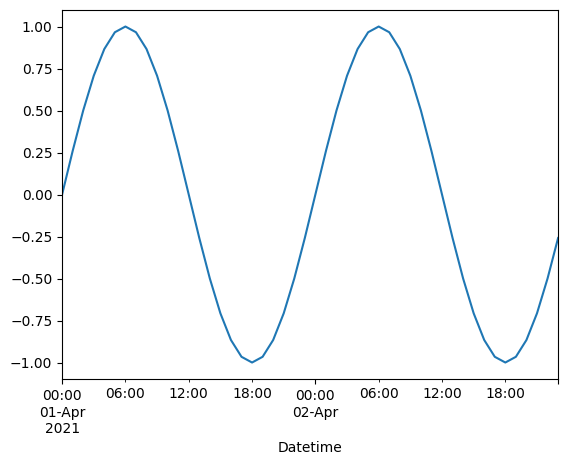

In [146]:
merged_df['2021-04-01':'2021-04-02'].hour_sin.plot.line()

<AxesSubplot: xlabel='Datetime'>

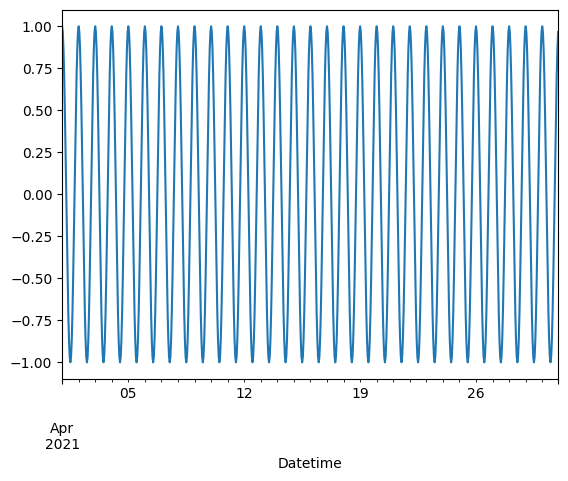

In [147]:
merged_df['2021-04-01':'2021-04-30'].hour_cos.plot.line()

In [148]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PRE_INS       126502 non-null  float64
 1   TEM_SEN       122417 non-null  float64
 2   VL_LATITUDE   126502 non-null  float64
 3   PRE_MAX       126467 non-null  float64
 4   RAD_GLO       119600 non-null  float64
 5   PTO_INS       122845 non-null  float64
 6   TEM_MIN       126462 non-null  float64
 7   VL_LONGITUDE  126502 non-null  float64
 8   UMD_MIN       122776 non-null  float64
 9   PTO_MAX       122766 non-null  float64
 10  VEN_DIR       117668 non-null  float64
 11  CHUVA         126502 non-null  float64
 12  PRE_MIN       126467 non-null  float64
 13  UMD_MAX       122791 non-null  float64
 14  VEN_VEL       126073 non-null  float64
 15  PTO_MIN       122759 non-null  float64
 16  TEM_MAX       126462 non-null  float64
 17  TEN_BAT       

In [149]:
merged_df.VEN_DIR.describe()

count    117668.000000
mean        157.998309
std          94.193409
min           1.000000
25%          82.000000
50%         122.000000
75%         254.000000
max         360.000000
Name: VEN_DIR, dtype: float64

In [150]:
merged_df.VEN_VEL.describe()

count    126073.000000
mean          2.696388
std           2.138765
min           0.000000
25%           1.300000
50%           2.100000
75%           3.500000
max          19.000000
Name: VEN_VEL, dtype: float64

In [151]:
from metpy.calc import wind_components
from metpy.units import units
def transform_wind(wind_speed, wind_direction, comp_idx):
    """
    Calculate the U or V wind vector component from the speed and direction.
    comp_idx = 0 --> computes the U component
    comp_idx = 1 --> computes the V component
    """
    return wind_components(wind_speed * units('m/s'), wind_direction * units.deg)[comp_idx].magnitude

In [152]:
merged_df['wind_u'] = merged_df.apply(lambda x: transform_wind(x.VEN_VEL, x.VEN_DIR, 0),axis=1)
merged_df['wind_v'] = merged_df.apply(lambda x: transform_wind(x.VEN_VEL, x.VEN_DIR, 1),axis=1)

In [153]:
merged_df[['wind_u', 'wind_v']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126502 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   wind_u  117659 non-null  float64
 1   wind_v  117659 non-null  float64
dtypes: float64(2)
memory usage: 6.9 MB


In [154]:
merged_df.shape

(126502, 32)

# Load ERA5 data

In [155]:
import pandas as pd
df_era5 = pd.read_csv('../data/numerical_models/ERA5_A652_1997-01-01_2021-12-31.csv')
df_era5.head()

,Unnamed: 0,time,Geopotential_1000,Humidity_1000,Temperature_1000,WindU_1000,WindV_1000,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
0,0,1997-01-01 00:00:00,761.01953,93.334625,296.63300,-4.256003,1.409247,30593.133,63.751728,283.34820,-4.662502,1.474666,121858.430,53.942772,219.95079,8.155405,18.910603
1,1,1997-01-01 01:00:00,821.15234,93.323135,296.50787,-4.284985,1.483690,30642.596,60.373314,283.34885,-5.011778,0.885895,121909.720,57.568870,219.94131,9.059913,20.765785
2,2,1997-01-01 02:00:00,803.20900,94.733950,296.26602,-3.620615,1.683330,30613.014,60.780630,282.87427,-5.369230,0.352392,121865.910,69.765335,219.65456,9.552922,21.786856
3,3,1997-01-01 03:00:00,783.81150,93.250870,296.15450,-3.719453,1.479742,30570.340,69.891020,282.19740,-5.060083,-0.110616,121795.914,86.235960,219.31718,10.648060,21.589832
4,4,1997-01-01 04:00:00,760.04980,92.815630,296.37106,-3.860651,1.191560,30545.121,72.518860,281.96786,-4.616427,-0.758039,121730.336,89.258070,219.29312,12.202025,22.129131


In [156]:
df_era5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219144 entries, 0 to 219143
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219144 non-null  int64  
 1   time               219144 non-null  object 
 2   Geopotential_1000  219144 non-null  float64
 3   Humidity_1000      219144 non-null  float64
 4   Temperature_1000   219144 non-null  float64
 5   WindU_1000         219144 non-null  float64
 6   WindV_1000         219144 non-null  float64
 7   Geopotential_700   219144 non-null  float64
 8   Humidity_700       219144 non-null  float64
 9   Temperature_700    219144 non-null  float64
 10  WindU_700          219144 non-null  float64
 11  WindV_700          219144 non-null  float64
 12  Geopotential_200   219144 non-null  float64
 13  Humidity_200       219144 non-null  float64
 14  Temperature_200    219144 non-null  float64
 15  WindU_200          219144 non-null  float64
 16  Wi

# Analyse preprocessed (parquet) files

In [162]:
import pandas as pd
df_sounding = pd.read_parquet('../data/sounding_stations/SBGL_indices_1997-01-01_2022-12-31_preprocessed.parquet.gzip')
df_sounding.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2010-06-03 21:00:00,5.976469,-88.126376,-266.246931,25.900000,36.700000,6.503206
2010-06-07 21:00:00,0.000000,0.000000,-266.490535,-20.300000,23.200000,14.967601
2010-06-08 21:00:00,5.984759,-51.057503,-271.164870,7.900000,39.800000,7.232244
2010-06-09 21:00:00,20.304654,-61.525741,-267.094000,19.600000,35.900000,7.704037
2010-06-14 21:00:00,0.000000,0.000000,-263.269304,-6.145098,34.609804,9.162783


In [163]:
min(df_sounding.index), max(df_sounding.index)

(Timestamp('1996-12-31 22:00:00'), Timestamp('2022-12-31 09:00:00'))

In [165]:
import pandas as pd
df_era5 = pd.read_parquet('../data/numerical_models/ERA5_A652_1997-01-01_2021-12-31_preprocessed.parquet.gzip')
df_era5.head()

,Geopotential_1000,Humidity_1000,Temperature_1000,WindU_1000,WindV_1000,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
Datetime,,,,,,,,,,,,,,,
1996-12-31 22:00:00,761.01953,93.334625,296.63300,-4.256003,1.409247,30593.133,63.751728,283.34820,-4.662502,1.474666,121858.430,53.942772,219.95079,8.155405,18.910603
1996-12-31 23:00:00,821.15234,93.323135,296.50787,-4.284985,1.483690,30642.596,60.373314,283.34885,-5.011778,0.885895,121909.720,57.568870,219.94131,9.059913,20.765785
1997-01-01 00:00:00,803.20900,94.733950,296.26602,-3.620615,1.683330,30613.014,60.780630,282.87427,-5.369230,0.352392,121865.910,69.765335,219.65456,9.552922,21.786856
1997-01-01 01:00:00,783.81150,93.250870,296.15450,-3.719453,1.479742,30570.340,69.891020,282.19740,-5.060083,-0.110616,121795.914,86.235960,219.31718,10.648060,21.589832
1997-01-01 02:00:00,760.04980,92.815630,296.37106,-3.860651,1.191560,30545.121,72.518860,281.96786,-4.616427,-0.758039,121730.336,89.258070,219.29312,12.202025,22.129131


In [166]:
min(df_era5.index), max(df_era5.index)

(Timestamp('1996-12-31 22:00:00'), Timestamp('2021-12-31 20:00:00'))

In [167]:
import pandas as pd
df_a652 = pd.read_parquet('../data/weather_stations/A652_1997_2022_preprocessed.parquet.gzip')
df_a652.head()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,wind_u,wind_v
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-18 18:00:00,1010.0,20.6,-22.988333,1010.1,100.8,21.1,23.5,-43.190556,85.0,21.2,...,4.6,21.1,23.8,11.7,6.4,26.0,23.5,86.0,3.195429,3.308963
2007-05-18 19:00:00,1010.4,19.3,-22.988333,1010.4,35.6,21.0,23.2,-43.190556,86.0,21.1,...,5.5,20.7,23.3,11.6,7.9,26.0,23.2,87.0,4.449593,3.232819
2007-05-19 11:00:00,1013.2,25.2,-22.988333,1013.2,91.2,19.3,23.1,-43.190556,74.0,19.3,...,0.4,18.2,23.6,11.7,2.0,23.0,23.6,77.0,-0.240726,-0.319454
2007-05-19 12:00:00,1013.5,25.7,-22.988333,1013.5,141.0,20.6,23.6,-43.190556,77.0,20.6,...,0.9,19.4,23.9,11.7,1.5,24.0,23.9,82.0,-0.873266,0.217730
2007-05-19 13:00:00,1013.8,22.5,-22.988333,1013.9,428.8,19.3,24.3,-43.190556,71.0,19.5,...,3.9,19.0,25.0,12.2,5.4,25.0,25.0,71.0,3.342952,2.008648


In [168]:
min(df_a652.index), max(df_a652.index)

(Timestamp('2007-05-18 18:00:00'), Timestamp('2021-12-31 23:00:00'))

In [352]:
# merge dataframes on datetime column
merged_df = pd.merge(df_a652, df_sounding, on='Datetime', how='left')
merged_df = pd.merge(merged_df, df_era5, on='Datetime', how='left')
merged_df.shape

(126514, 45)

In [353]:
merged_df.head()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-18 18:00:00,1010.0,20.6,-22.988333,1010.1,100.8,21.1,23.5,-43.190556,85.0,21.2,...,31022.871,76.54588,279.03050,4.168104,1.659702,121095.38,100.121600,216.96600,33.835830,-0.255959
2007-05-18 19:00:00,1010.4,19.3,-22.988333,1010.4,35.6,21.0,23.2,-43.190556,86.0,21.1,...,31061.027,85.75412,278.75080,5.051537,2.083962,121092.32,68.894684,217.22784,35.761246,1.462800
2007-05-19 11:00:00,1013.2,25.2,-22.988333,1013.2,91.2,19.3,23.1,-43.190556,74.0,19.3,...,31081.797,84.18533,278.04507,8.357589,1.971448,120743.45,88.954100,217.00969,48.935530,-0.136934
2007-05-19 12:00:00,1013.5,25.7,-22.988333,1013.5,141.0,20.6,23.6,-43.190556,77.0,20.6,...,31036.877,84.10824,278.15695,8.617892,2.035114,120705.34,84.350890,217.09445,49.752990,-0.015077
2007-05-19 13:00:00,1013.8,22.5,-22.988333,1013.9,428.8,19.3,24.3,-43.190556,71.0,19.5,...,30978.918,81.14833,278.46800,8.629875,2.251360,120674.73,75.106415,217.21912,49.909187,-0.499673


In [354]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126514 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PRE_INS            126514 non-null  float64
 1   TEM_SEN            122429 non-null  float64
 2   VL_LATITUDE        126514 non-null  float64
 3   PRE_MAX            126479 non-null  float64
 4   RAD_GLO            119611 non-null  float64
 5   PTO_INS            122857 non-null  float64
 6   TEM_MIN            126474 non-null  float64
 7   VL_LONGITUDE       126514 non-null  float64
 8   UMD_MIN            122788 non-null  float64
 9   PTO_MAX            122778 non-null  float64
 10  VEN_DIR            117679 non-null  float64
 11  CHUVA              126514 non-null  float64
 12  PRE_MIN            126479 non-null  float64
 13  UMD_MAX            122803 non-null  float64
 14  VEN_VEL            126085 non-null  float64
 15  PTO_MIN          

In [355]:
merged_df = merged_df[merged_df.wind_u.notna() & merged_df.wind_v.notna()]
merged_df.shape

(117670, 45)

In [356]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117670 entries, 2007-05-18 18:00:00 to 2021-12-31 23:00:00
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PRE_INS            117670 non-null  float64
 1   TEM_SEN            114014 non-null  float64
 2   VL_LATITUDE        117670 non-null  float64
 3   PRE_MAX            117646 non-null  float64
 4   RAD_GLO            110835 non-null  float64
 5   PTO_INS            114013 non-null  float64
 6   TEM_MIN            117641 non-null  float64
 7   VL_LONGITUDE       117670 non-null  float64
 8   UMD_MIN            113955 non-null  float64
 9   PTO_MAX            113945 non-null  float64
 10  VEN_DIR            117670 non-null  float64
 11  CHUVA              117670 non-null  float64
 12  PRE_MIN            117646 non-null  float64
 13  UMD_MAX            113970 non-null  float64
 14  VEN_VEL            117670 non-null  float64
 15  PTO_MIN          

In [357]:
merged_df.describe()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
count,117670.000000,114014.000000,1.176700e+05,117646.000000,110835.000000,114013.000000,117641.000000,117670.000000,113955.000000,113945.000000,...,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000
mean,1011.419760,22.843633,-2.298833e+01,1011.652744,722.962103,19.296304,23.011902,-43.190556,75.528094,19.794389,...,30985.602452,50.629075,280.588907,3.909862,-0.537006,121027.675210,53.146471,218.547385,22.174020,4.894950
std,4.772527,4.607158,7.105458e-15,4.753427,1082.760717,2.823584,2.902539,0.000000,11.948944,2.807879,...,250.223284,30.107986,2.183724,5.444419,3.786110,749.572834,31.994526,1.987466,16.080167,12.335430
min,994.700000,-2.700000,-2.298833e+01,994.800000,-3.500000,-9.200000,13.600000,-43.190556,14.000000,-2.200000,...,29802.428000,0.040688,269.878660,-16.214897,-19.385345,117581.080000,0.642525,210.572630,-40.032806,-43.809982
25%,1008.000000,20.200000,-2.298833e+01,1008.300000,-1.400000,17.500000,20.900000,-43.190556,69.000000,18.000000,...,30829.672000,20.136384,279.292765,0.185875,-2.979461,120498.769000,24.161478,217.249280,11.612775,-2.841888
50%,1011.100000,23.100000,-2.298833e+01,1011.300000,32.400000,19.500000,22.800000,-43.190556,77.000000,20.000000,...,31001.809000,56.690003,280.930850,3.629728,-0.529620,121089.516000,48.217030,218.634790,22.307817,4.671119
75%,1014.600000,26.000000,-2.298833e+01,1014.800000,1212.750000,21.400000,24.900000,-43.190556,84.000000,21.800000,...,31155.555000,76.733300,282.158300,7.349173,1.963446,121593.790000,83.087049,219.855232,33.872390,12.689423
max,1028.800000,38.800000,-2.298833e+01,1028.800000,5308.300000,28.000000,37.800000,-43.190556,100.000000,32.900000,...,31828.758000,105.586010,286.937160,31.241158,16.203634,123094.090000,128.762080,228.619340,69.617310,62.492294


In [390]:
merged_df[['TEM_MAX', 'PRE_MAX', 'UMD_MAX', 'wind_u', 'wind_v', 'CHUVA']]

,TEM_MAX,PRE_MAX,UMD_MAX,wind_u,wind_v,CHUVA
Datetime,,,,,,
2007-05-18 18:00:00,23.8,1010.1,87.0,3.195429,3.308963,0.0
2007-05-18 19:00:00,23.3,1010.4,88.0,4.449593,3.232819,0.0
2007-05-19 11:00:00,23.6,1013.2,77.0,-0.240726,-0.319454,0.0
2007-05-19 12:00:00,23.9,1013.5,82.0,-0.873266,0.217730,0.0
2007-05-19 13:00:00,25.0,1013.9,74.0,3.342952,2.008648,0.0
...,...,...,...,...,...,...
2021-12-31 19:00:00,23.9,1003.7,92.0,-1.499772,-0.026179,0.4
2021-12-31 20:00:00,24.0,1003.3,91.0,-3.160603,0.500590,0.2
2021-12-31 21:00:00,24.0,1003.5,89.0,-2.896026,0.151774,0.2


# Análise de correlações

In [358]:
#####
#####
# merged_df = merged_df[merged_df.CHUVA > 5]
#####
#####

In [359]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)


def draw_corr_matrix(d):
    # Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [360]:
df_corr_sounding = merged_df[['CHUVA', 'cape', 'cin', 'lift', 'k', 'total_totals', 'showalter']]
df_corr_sounding.corr()

,CHUVA,cape,cin,lift,k,total_totals,showalter
CHUVA,1.000000,-0.028052,0.040462,0.003842,0.087386,0.028061,-0.042068
cape,-0.028052,1.000000,0.023299,-0.600514,0.251208,0.254033,-0.289040
cin,0.040462,0.023299,1.000000,0.188931,-0.111521,-0.221409,0.181690
lift,0.003842,-0.600514,0.188931,1.000000,-0.578165,-0.688882,0.719006
k,0.087386,0.251208,-0.111521,-0.578165,1.000000,0.679727,-0.742541
total_totals,0.028061,0.254033,-0.221409,-0.688882,0.679727,1.000000,-0.950076
showalter,-0.042068,-0.289040,0.181690,0.719006,-0.742541,-0.950076,1.000000


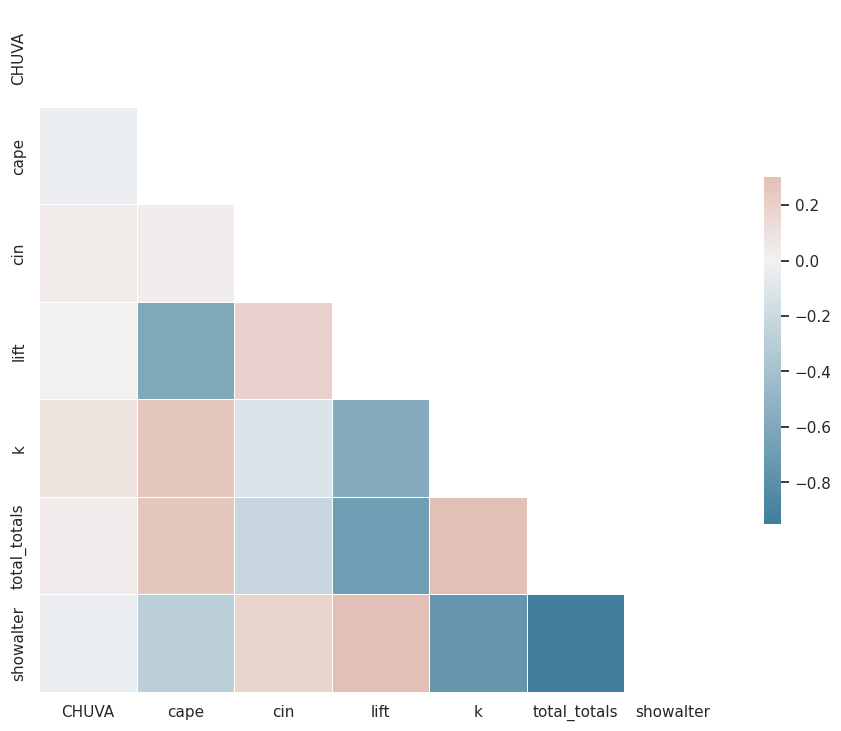

In [361]:
draw_corr_matrix(df_corr_sounding)

In [362]:
df_corr_era5_200hPa = merged_df[['CHUVA', 'Geopotential_200', 'Humidity_200', 'Temperature_200', 'WindU_200', 'WindV_200']]
df_corr_era5_200hPa.corr()

,CHUVA,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
CHUVA,1.000000,0.011374,0.036270,0.020462,0.029042,-0.052326
Geopotential_200,0.011374,1.000000,0.341940,0.345676,-0.568677,0.130554
Humidity_200,0.036270,0.341940,1.000000,-0.377697,-0.005403,-0.072029
Temperature_200,0.020462,0.345676,-0.377697,1.000000,-0.225718,0.068644
WindU_200,0.029042,-0.568677,-0.005403,-0.225718,1.000000,-0.251762
WindV_200,-0.052326,0.130554,-0.072029,0.068644,-0.251762,1.000000


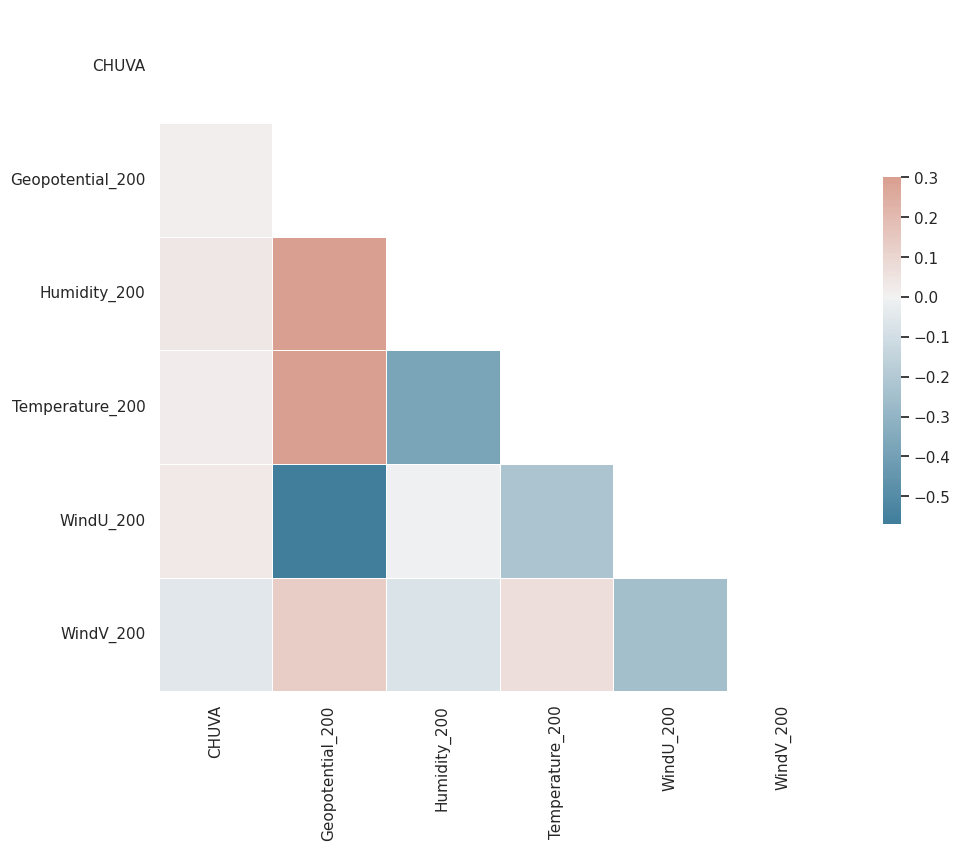

In [363]:
draw_corr_matrix(df_corr_era5_200hPa)

In [364]:
df_corr_era5_700hPa = merged_df[['CHUVA', 'Geopotential_700', 'Humidity_700', 'Temperature_700', 'WindU_700', 'WindV_700']]
df_corr_era5_700hPa.corr()

,CHUVA,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700
CHUVA,1.000000,-0.057293,0.124145,-0.041259,0.032405,-0.034765
Geopotential_700,-0.057293,1.000000,-0.268589,0.183573,-0.452966,0.041150
Humidity_700,0.124145,-0.268589,1.000000,-0.146802,0.257047,-0.205985
Temperature_700,-0.041259,0.183573,-0.146802,1.000000,-0.234698,-0.068109
WindU_700,0.032405,-0.452966,0.257047,-0.234698,1.000000,0.006408
WindV_700,-0.034765,0.041150,-0.205985,-0.068109,0.006408,1.000000


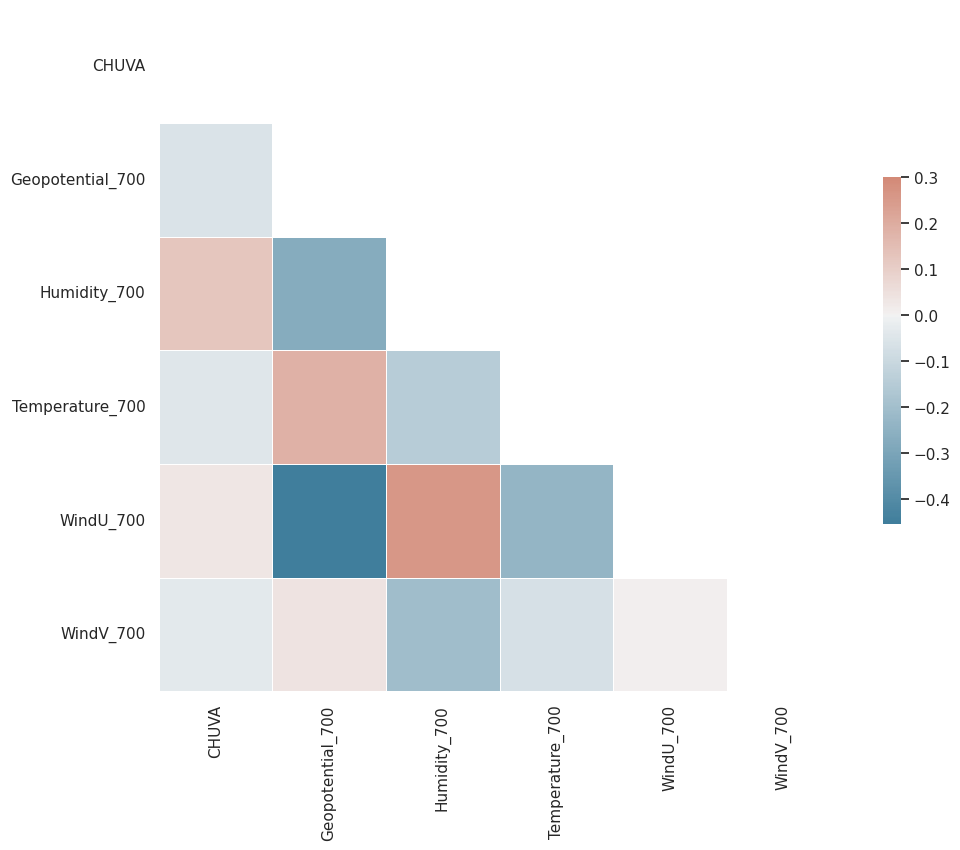

In [365]:
draw_corr_matrix(df_corr_era5_700hPa)

In [366]:
df_corr_era5_1000hPa = merged_df[['CHUVA', 'Geopotential_1000', 'Humidity_1000', 'Temperature_1000', 'WindU_1000', 'WindV_1000']]
df_corr_era5_1000hPa.corr()

,CHUVA,Geopotential_1000,Humidity_1000,Temperature_1000,WindU_1000,WindV_1000
CHUVA,1.000000,-0.004767,0.097869,-0.047351,0.040388,0.094452
Geopotential_1000,-0.004767,1.000000,0.002388,-0.700751,-0.115156,0.053354
Humidity_1000,0.097869,0.002388,1.000000,-0.401058,0.119889,0.254919
Temperature_1000,-0.047351,-0.700751,-0.401058,1.000000,-0.069290,-0.158982
WindU_1000,0.040388,-0.115156,0.119889,-0.069290,1.000000,0.347042
WindV_1000,0.094452,0.053354,0.254919,-0.158982,0.347042,1.000000


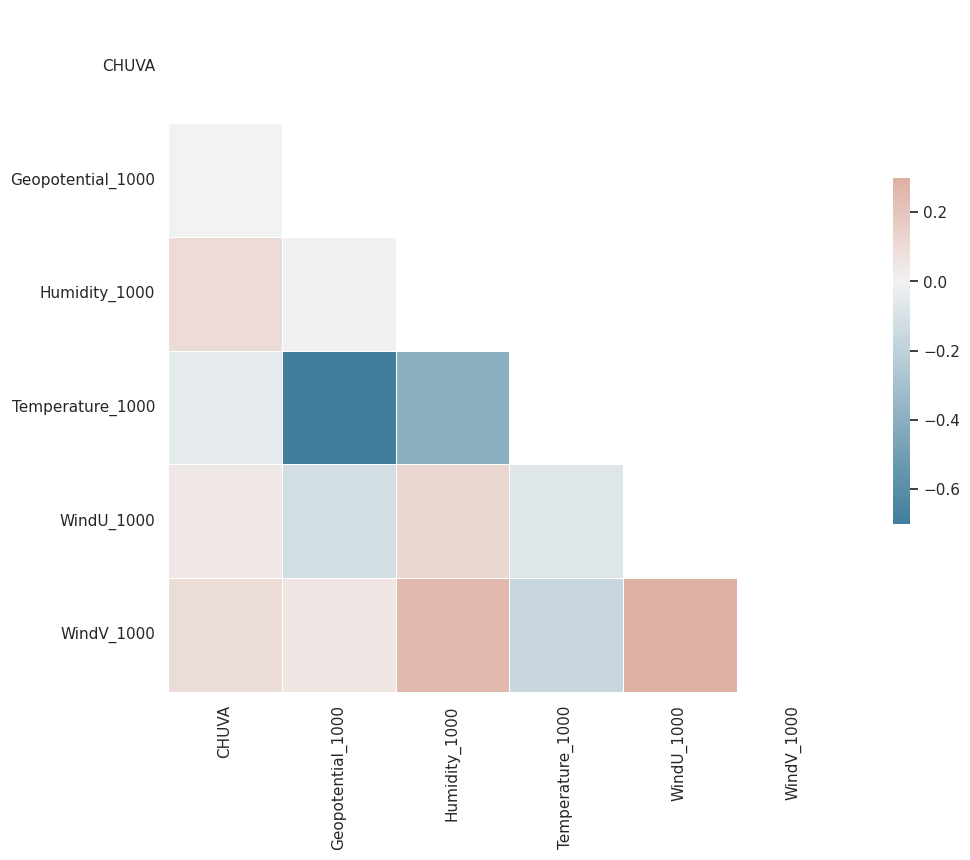

In [367]:
draw_corr_matrix(df_corr_era5_1000hPa)

In [368]:
df_corr_a652_wind_u_v = merged_df[['CHUVA', 'wind_u', 'wind_v']]
df_corr_a652_wind_u_v.corr()

,CHUVA,wind_u,wind_v
CHUVA,1.000000,0.041251,0.058514
wind_u,0.041251,1.000000,-0.031126
wind_v,0.058514,-0.031126,1.000000


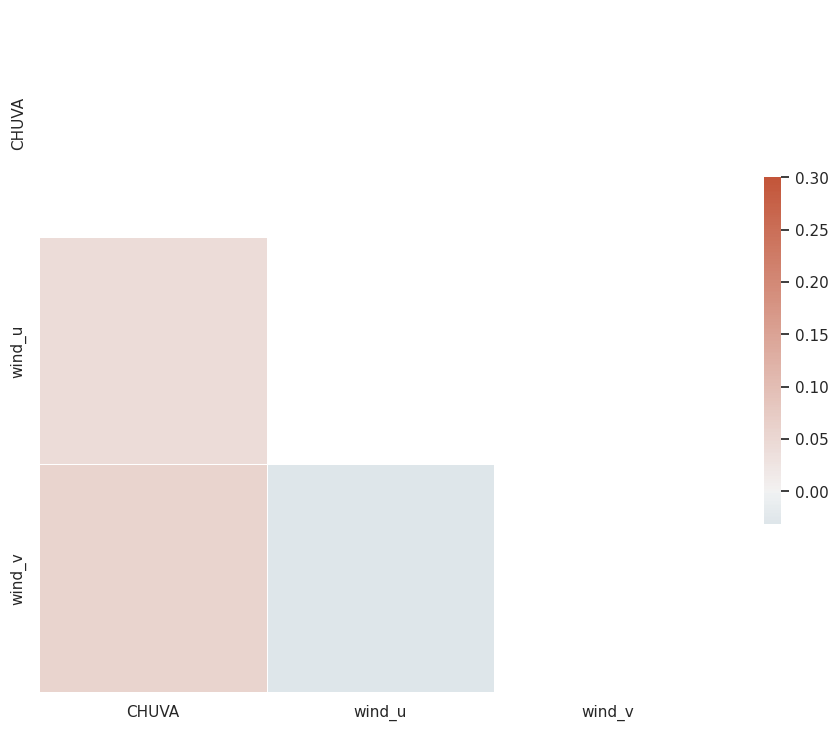

In [369]:
draw_corr_matrix(df_corr_a652_wind_u_v)

In [370]:
df_corr_a652_ven = merged_df[['CHUVA', 'VEN_VEL', 'VEN_DIR', 'VEN_RAJ']]
df_corr_a652_ven.corr()

,CHUVA,VEN_VEL,VEN_DIR,VEN_RAJ
CHUVA,1.000000,0.061503,0.050655,0.128197
VEN_VEL,0.061503,1.000000,0.095782,0.837618
VEN_DIR,0.050655,0.095782,1.000000,0.152944
VEN_RAJ,0.128197,0.837618,0.152944,1.000000


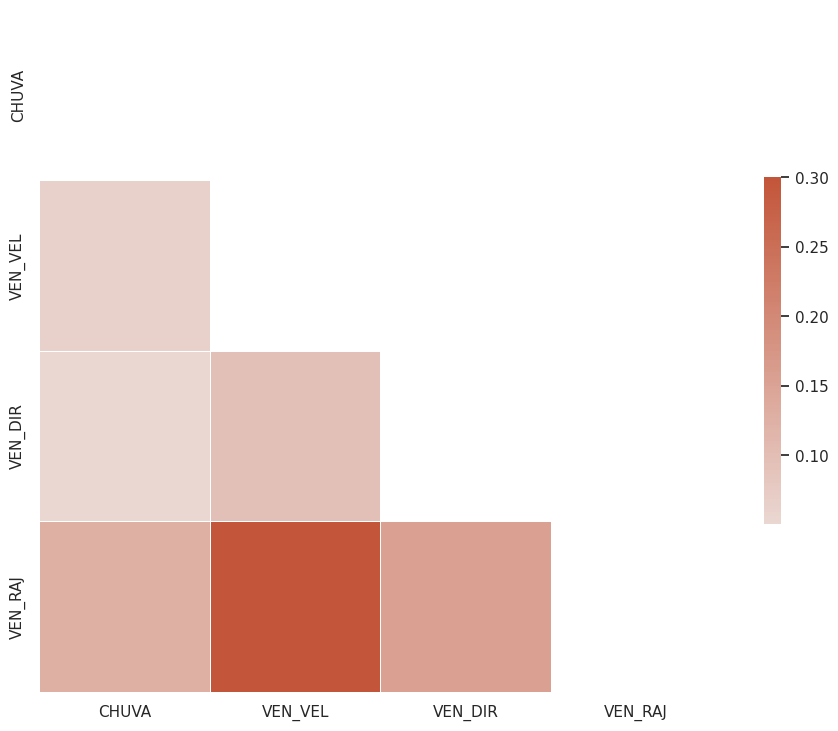

In [371]:
draw_corr_matrix(df_corr_a652_ven)

In [372]:
df_corr_a652_tem = merged_df[['CHUVA', 'TEM_MIN', 'TEM_MAX', 'TEM_INS', 'TEM_CPU', 'TEM_SEN']]
df_corr_a652_tem.corr()

,CHUVA,TEM_MIN,TEM_MAX,TEM_INS,TEM_CPU,TEM_SEN
CHUVA,1.000000,-0.074164,-0.062975,-0.077040,-0.061861,-0.081297
TEM_MIN,-0.074164,1.000000,0.968875,0.977517,0.921157,0.808718
TEM_MAX,-0.062975,0.968875,1.000000,0.979934,0.930795,0.797468
TEM_INS,-0.077040,0.977517,0.979934,1.000000,0.903913,0.829055
TEM_CPU,-0.061861,0.921157,0.930795,0.903913,1.000000,0.693829
TEM_SEN,-0.081297,0.808718,0.797468,0.829055,0.693829,1.000000


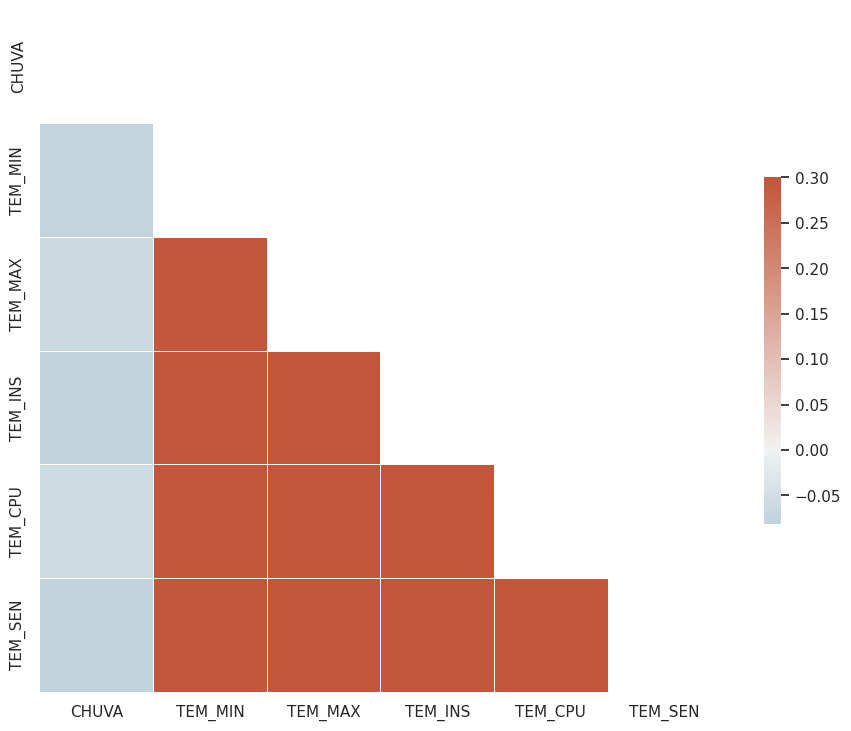

In [373]:
draw_corr_matrix(df_corr_a652_tem)

In [374]:
df_corr_a652_pre = merged_df[['CHUVA', 'PRE_MIN', 'PRE_MAX', 'PRE_INS']]
df_corr_a652_pre.corr()

,CHUVA,PRE_MIN,PRE_MAX,PRE_INS
CHUVA,1.000000,-0.013711,-0.006771,-0.007652
PRE_MIN,-0.013711,1.000000,0.998199,0.998114
PRE_MAX,-0.006771,0.998199,1.000000,0.998135
PRE_INS,-0.007652,0.998114,0.998135,1.000000


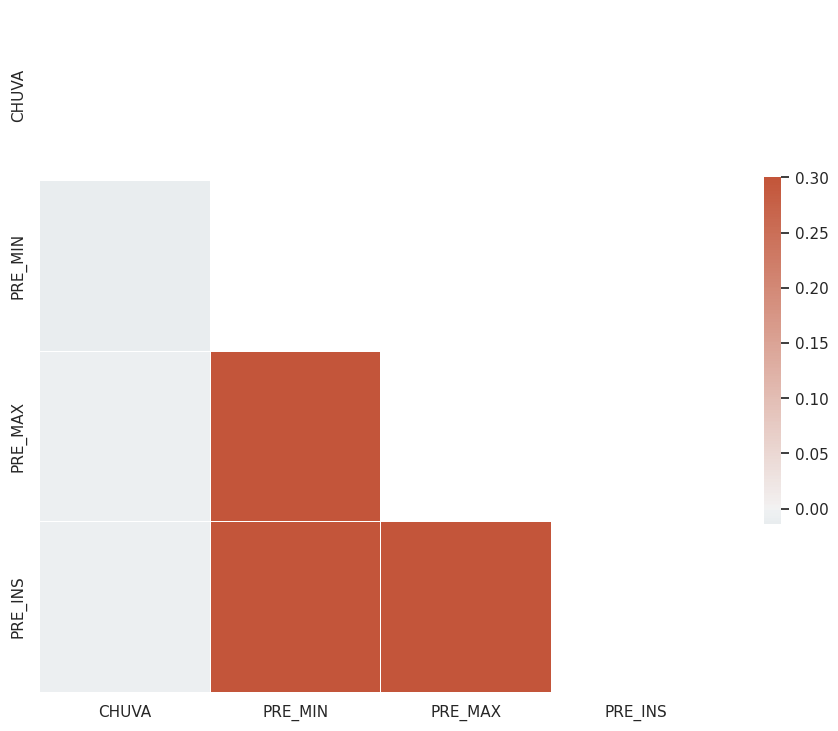

In [375]:
draw_corr_matrix(df_corr_a652_pre)

In [376]:
df_corr_a652_umd = merged_df[['CHUVA', 'UMD_MIN', 'UMD_MAX', 'UMD_INS']]
df_corr_a652_umd.corr()

,CHUVA,UMD_MIN,UMD_MAX,UMD_INS
CHUVA,1.000000,0.126881,0.134464,0.141906
UMD_MIN,0.126881,1.000000,0.945116,0.961988
UMD_MAX,0.134464,0.945116,1.000000,0.958201
UMD_INS,0.141906,0.961988,0.958201,1.000000


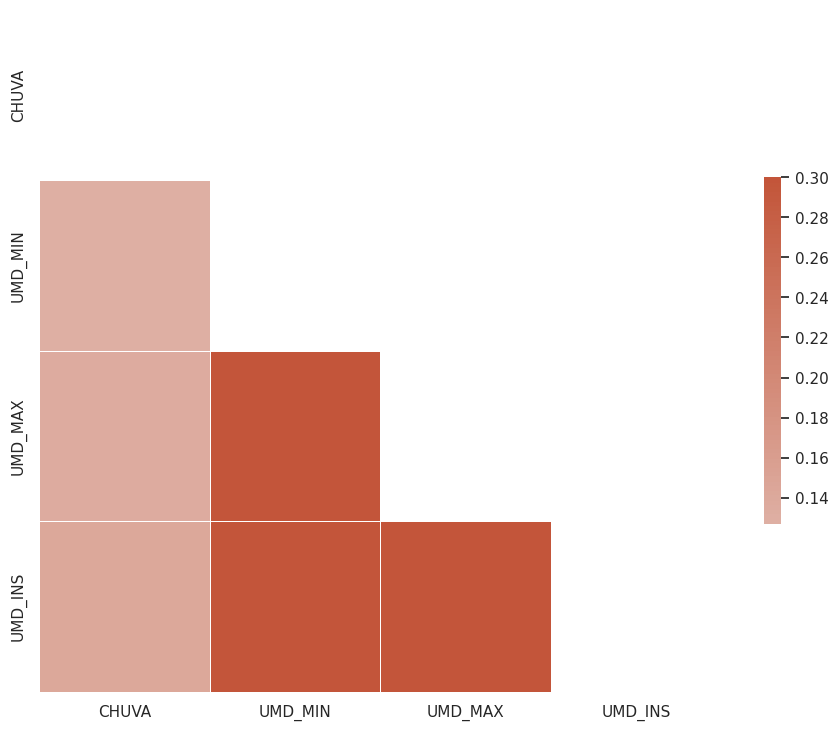

In [377]:
draw_corr_matrix(df_corr_a652_umd)

In [378]:
other_variables = ['CHUVA',
                   
                   'RAD_GLO',

                   'PTO_MIN',
                   'PTO_MAX',
                   'PTO_INS',
                   
                   'TEN_BAT']
df_corr_a652_other = merged_df[other_variables]
df_corr_a652_other.corr()

,CHUVA,RAD_GLO,PTO_MIN,PTO_MAX,PTO_INS,TEN_BAT
CHUVA,1.000000,-0.064922,0.032659,0.028832,0.029344,-0.065702
RAD_GLO,-0.064922,1.000000,0.112573,0.254511,0.189207,0.798491
PTO_MIN,0.032659,0.112573,1.000000,0.960453,0.977696,0.062729
PTO_MAX,0.028832,0.254511,0.960453,1.000000,0.980499,0.194677
PTO_INS,0.029344,0.189207,0.977696,0.980499,1.000000,0.136415
TEN_BAT,-0.065702,0.798491,0.062729,0.194677,0.136415,1.000000


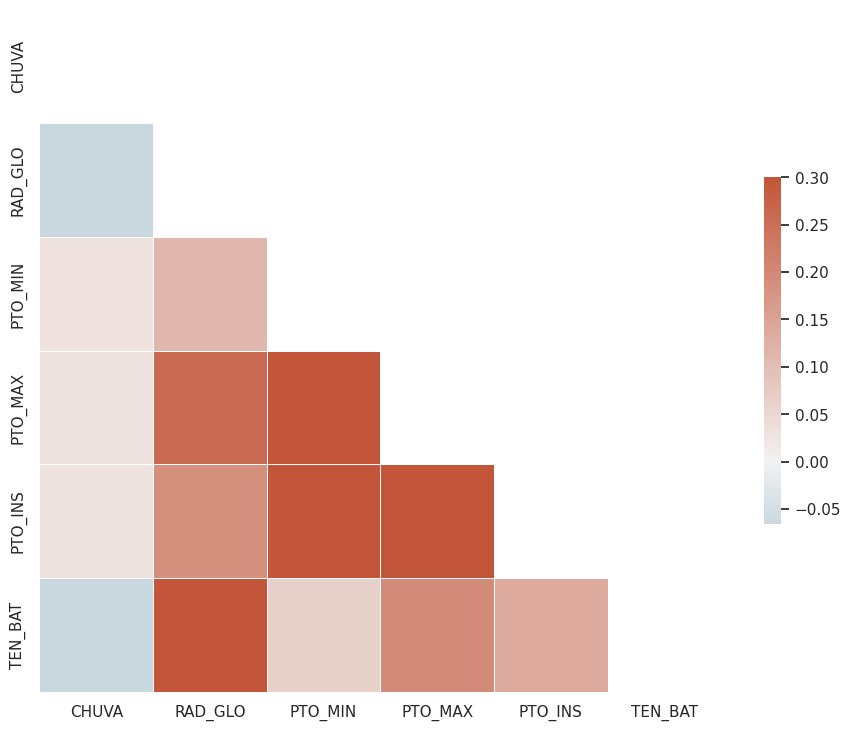

In [379]:
draw_corr_matrix(df_corr_a652_other)

## Sumários estatísticos

In [380]:
df_corr_sounding.describe()

,CHUVA,cape,cin,lift,k,total_totals,showalter
count,117670.000000,8441.000000,8441.000000,8429.000000,8429.000000,8429.000000,8429.000000
mean,0.132775,378.178139,-101.469181,-272.213674,18.577769,41.107153,3.367223
std,1.074479,820.974266,155.789651,3.937777,18.989522,6.170439,4.211567
min,0.000000,-781.556574,-1177.005606,-308.092055,-58.300000,-10.200000,-9.529668
25%,0.000000,0.000000,-151.403322,-275.131396,6.100000,37.800000,0.291159
50%,0.000000,49.059928,-24.373976,-272.598350,26.700000,42.200000,2.630801
75%,0.000000,511.960405,0.000000,-269.651116,33.000000,45.300000,5.984156
max,71.600000,45428.959888,0.000000,-245.255288,46.400000,61.168432,30.800456


In [381]:
df_corr_era5_200hPa.describe()

,CHUVA,Geopotential_200,Humidity_200,Temperature_200,WindU_200,WindV_200
count,117670.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000
mean,0.132775,121027.675210,53.146471,218.547385,22.174020,4.894950
std,1.074479,749.572834,31.994526,1.987466,16.080167,12.335430
min,0.000000,117581.080000,0.642525,210.572630,-40.032806,-43.809982
25%,0.000000,120498.769000,24.161478,217.249280,11.612775,-2.841888
50%,0.000000,121089.516000,48.217030,218.634790,22.307817,4.671119
75%,0.000000,121593.790000,83.087049,219.855232,33.872390,12.689423
max,71.600000,123094.090000,128.762080,228.619340,69.617310,62.492294


In [382]:
df_corr_era5_700hPa.describe()

,CHUVA,Geopotential_700,Humidity_700,Temperature_700,WindU_700,WindV_700
count,117670.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000
mean,0.132775,30985.602452,50.629075,280.588907,3.909862,-0.537006
std,1.074479,250.223284,30.107986,2.183724,5.444419,3.786110
min,0.000000,29802.428000,0.040688,269.878660,-16.214897,-19.385345
25%,0.000000,30829.672000,20.136384,279.292765,0.185875,-2.979461
50%,0.000000,31001.809000,56.690003,280.930850,3.629728,-0.529620
75%,0.000000,31155.555000,76.733300,282.158300,7.349173,1.963446
max,71.600000,31828.758000,105.586010,286.937160,31.241158,16.203634


In [383]:
df_corr_era5_1000hPa.describe()

,CHUVA,Geopotential_1000,Humidity_1000,Temperature_1000,WindU_1000,WindV_1000
count,117670.000000,117656.000000,117656.000000,117656.000000,117656.000000,117656.000000
mean,0.132775,1320.490931,77.632696,296.140529,-1.275907,0.172453
std,1.074479,396.161010,12.617428,3.398489,3.487153,2.509600
min,0.000000,-168.905270,23.460262,286.466830,-13.339456,-10.262180
25%,0.000000,1039.993200,70.092499,293.615495,-3.646232,-1.611838
50%,0.000000,1293.595700,79.996640,295.938180,-1.307158,-0.198058
75%,0.000000,1587.144500,87.197556,298.385220,0.976646,1.757019
max,71.600000,2738.462000,103.782810,309.836730,13.503730,12.542596


In [384]:
df_corr_a652_wind_u_v.describe()

,CHUVA,wind_u,wind_v
count,117670.000000,117670.000000,117670.000000
mean,0.132775,-0.371816,0.335300
std,1.074479,3.084545,1.462646
min,0.000000,-15.000000,-11.960672
25%,0.000000,-1.980536,-0.514940
50%,0.000000,-0.613720,0.062819
75%,0.000000,1.167780,0.957953
max,71.600000,18.997106,12.623223


In [385]:
df_corr_a652_ven.describe()

,CHUVA,VEN_VEL,VEN_DIR,VEN_RAJ
count,117670.000000,117670.000000,117670.000000,117557.000000
mean,0.132775,2.706703,157.994281,5.668048
std,1.074479,2.139655,94.191383,3.203063
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.300000,82.000000,3.400000
50%,0.000000,2.100000,122.000000,4.900000
75%,0.000000,3.500000,254.000000,7.100000
max,71.600000,19.000000,360.000000,43.100000


In [386]:
df_corr_a652_tem.describe()

,CHUVA,TEM_MIN,TEM_MAX,TEM_INS,TEM_CPU,TEM_SEN
count,117670.000000,117641.000000,117641.000000,117666.000000,117670.000000,114014.000000
mean,0.132775,23.011902,24.039205,23.508692,25.409000,22.843633
std,1.074479,2.902539,3.298322,3.101590,3.817592,4.607158
min,0.000000,13.600000,14.300000,14.300000,15.000000,-2.700000
25%,0.000000,20.900000,21.600000,21.300000,23.000000,20.200000
50%,0.000000,22.800000,23.700000,23.200000,25.000000,23.100000
75%,0.000000,24.900000,26.100000,25.400000,28.000000,26.000000
max,71.600000,37.800000,39.700000,38.800000,41.000000,38.800000


In [387]:
df_corr_a652_pre.describe()

,CHUVA,PRE_MIN,PRE_MAX,PRE_INS
count,117670.000000,117646.000000,117646.000000,117670.000000
mean,0.132775,1011.185545,1011.652744,1011.419760
std,1.074479,4.786621,4.753427,4.772527
min,0.000000,994.600000,994.800000,994.700000
25%,0.000000,1007.800000,1008.300000,1008.000000
50%,0.000000,1010.800000,1011.300000,1011.100000
75%,0.000000,1014.400000,1014.800000,1014.600000
max,71.600000,1028.500000,1028.800000,1028.800000


In [388]:
df_corr_a652_umd.describe()

,CHUVA,UMD_MIN,UMD_MAX,UMD_INS
count,117670.000000,113955.000000,113970.000000,114016.000000
mean,0.132775,75.528094,80.241879,77.965759
std,1.074479,11.948944,9.798572,10.950490
min,0.000000,14.000000,8.000000,11.000000
25%,0.000000,69.000000,75.000000,72.000000
50%,0.000000,77.000000,82.000000,79.000000
75%,0.000000,84.000000,87.000000,86.000000
max,71.600000,100.000000,100.000000,100.000000


In [389]:
df_corr_a652_other.describe()

,CHUVA,RAD_GLO,PTO_MIN,PTO_MAX,PTO_INS,TEN_BAT
count,117670.000000,110835.000000,113938.000000,113945.000000,114013.000000,117670.000000
mean,0.132775,722.962103,18.812947,19.794389,19.296304,12.959539
std,1.074479,1082.760717,2.849625,2.807879,2.823584,0.675853
min,0.000000,-3.500000,-1.500000,-2.200000,-9.200000,10.000000
25%,0.000000,-1.400000,17.000000,18.000000,17.500000,12.500000
50%,0.000000,32.400000,19.100000,20.000000,19.500000,12.600000
75%,0.000000,1212.750000,20.900000,21.800000,21.400000,13.500000
max,71.600000,5308.300000,26.900000,32.900000,28.000000,14.500000
